In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
df = pd.read_csv(r'C:\Users\Thyana De Lara\Documents\TCC\modelo_vendas_forecasting\versao_2\1.dados_tratado.csv')

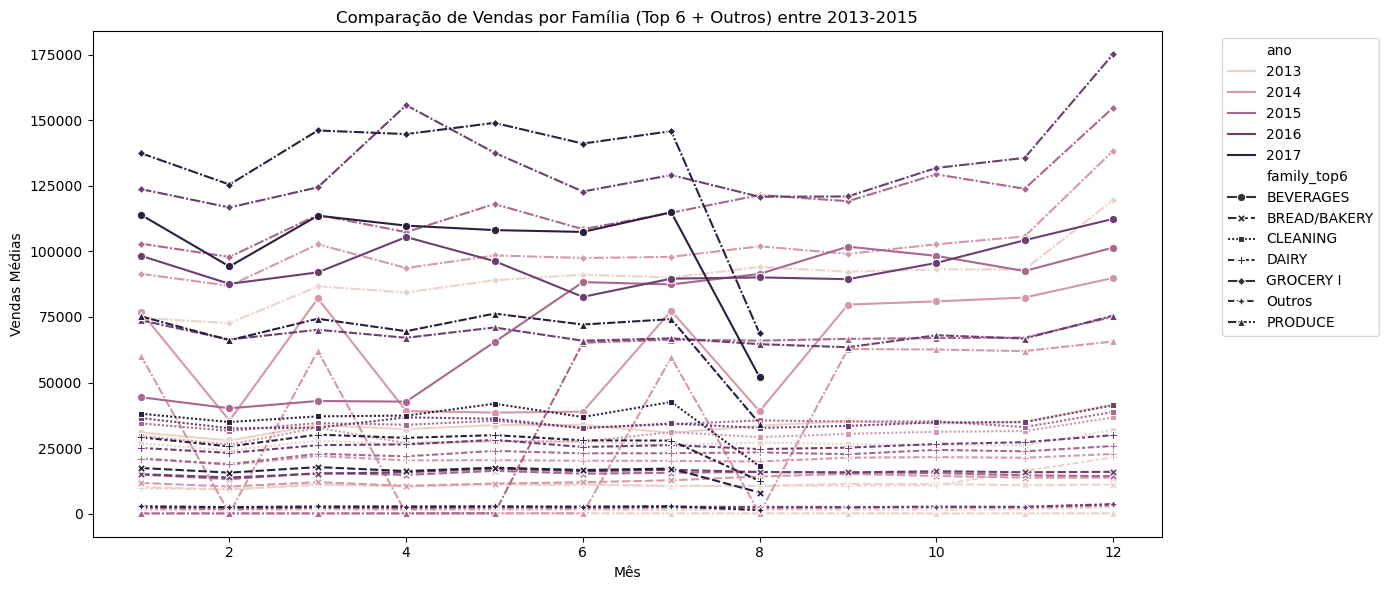

In [69]:
# 1. Identificar as 6 famílias com maior volume total de vendas
top6_families = df.groupby('family')['sales'].sum().sort_values(ascending=False).head(6).index.tolist()

# 2. Criar coluna com Top 6 + "Outros"
df['family_top6'] = df['family'].apply(lambda x: x if x in top6_families else 'Outros')

# 3. Filtrar os anos de interesse
#df_filtrado = df[df['ano'].isin([2013, 2014, 2015])]

# 4. Agrupar por ano, mês e family_top6
df_grouped = df.groupby(['ano', 'mes', 'family_top6'])['sales'].mean().reset_index()

# 5. Plotar o gráfico
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grouped, x='mes', y='sales', hue='ano', style='family_top6', markers=True)
plt.title('Comparação de Vendas por Família (Top 6 + Outros) entre 2013-2015')
plt.xlabel('Mês')
plt.ylabel('Vendas Médias')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


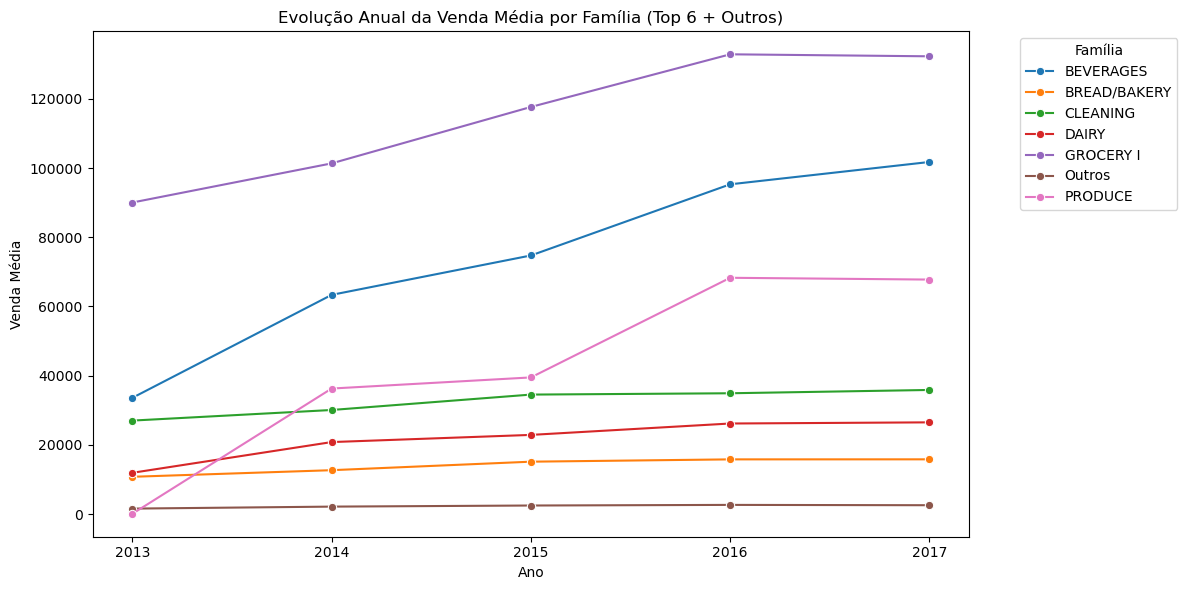

In [31]:

# Agrupar por ano e família (Top 6 + Outros), tirando a média das vendas no ano
df_grouped_ano = df.groupby(['ano', 'family_top6'])['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_ano, x='ano', y='sales', hue='family_top6', marker='o')
plt.title('Evolução Anual da Venda Média por Família (Top 6 + Outros)')
plt.xlabel('Ano')
plt.ylabel('Venda Média')
plt.xticks(df['ano'].unique())
plt.legend(title='Família', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

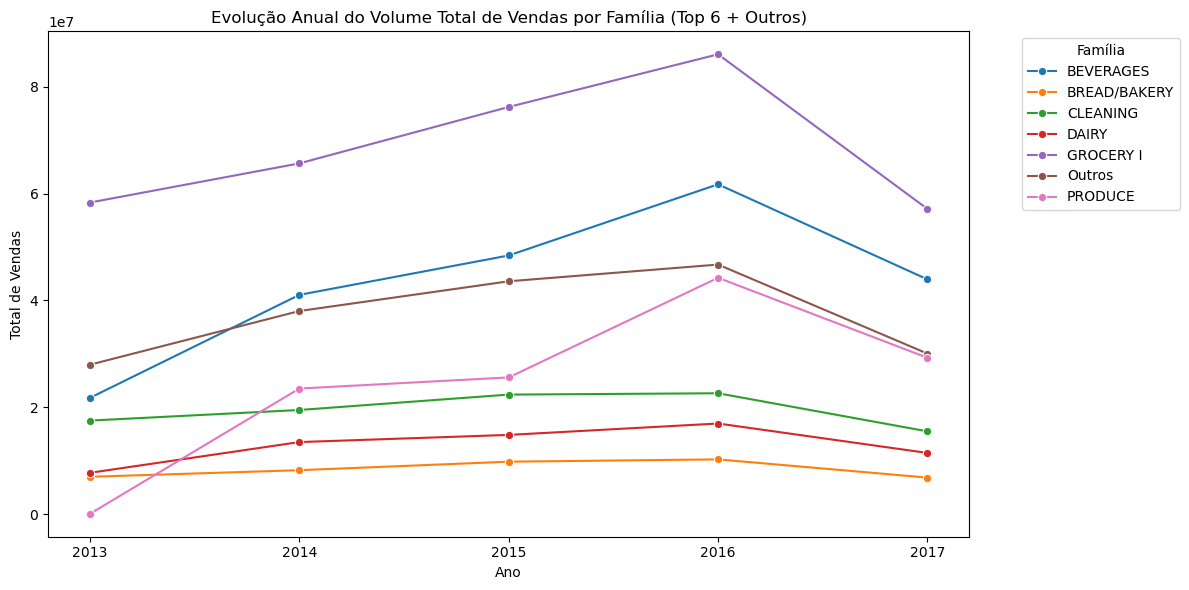

In [70]:
df_grouped_ano_total = df.groupby(['ano', 'family_top6'])['sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_ano_total, x='ano', y='sales', hue='family_top6', marker='o')
plt.title('Evolução Anual do Volume Total de Vendas por Família (Top 6 + Outros)')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.xticks(df['ano'].unique())
plt.legend(title='Família', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


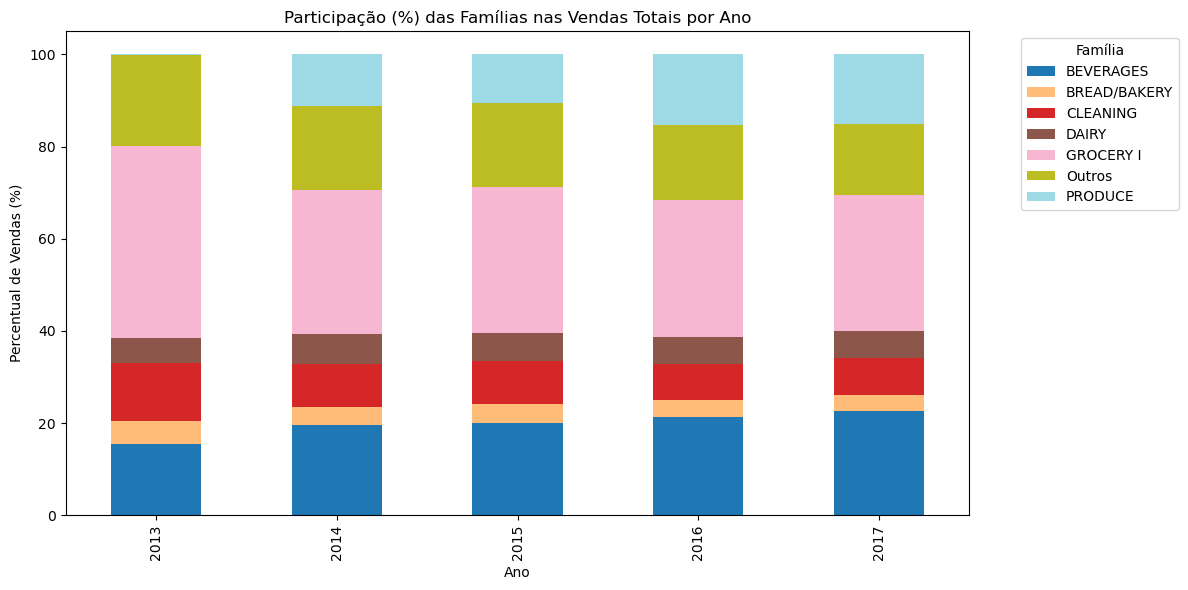

In [71]:
# Calcular o total por ano
total_por_ano = df_grouped_ano_total.groupby('ano')['sales'].transform('sum')

# Calcular a porcentagem da família dentro do ano
df_grouped_ano_total['pct'] = df_grouped_ano_total['sales'] / total_por_ano * 100

# Transformar em tabela com anos como índice e famílias como colunas
df_grouped_ano_total_pivot = df_grouped_ano_total.pivot(index='ano', columns='family_top6', values='pct').fillna(0)


# Plotar gráfico de barras empilhadas
ax = df_grouped_ano_total_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Participação (%) das Famílias nas Vendas Totais por Ano')
plt.xlabel('Ano')
plt.ylabel('Percentual de Vendas (%)')
plt.legend(title='Família', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
df['ano_mes'] = pd.to_datetime(df[['ano', 'mes']].rename(columns={'ano': 'year', 'mes': 'month'}).assign(day=1))


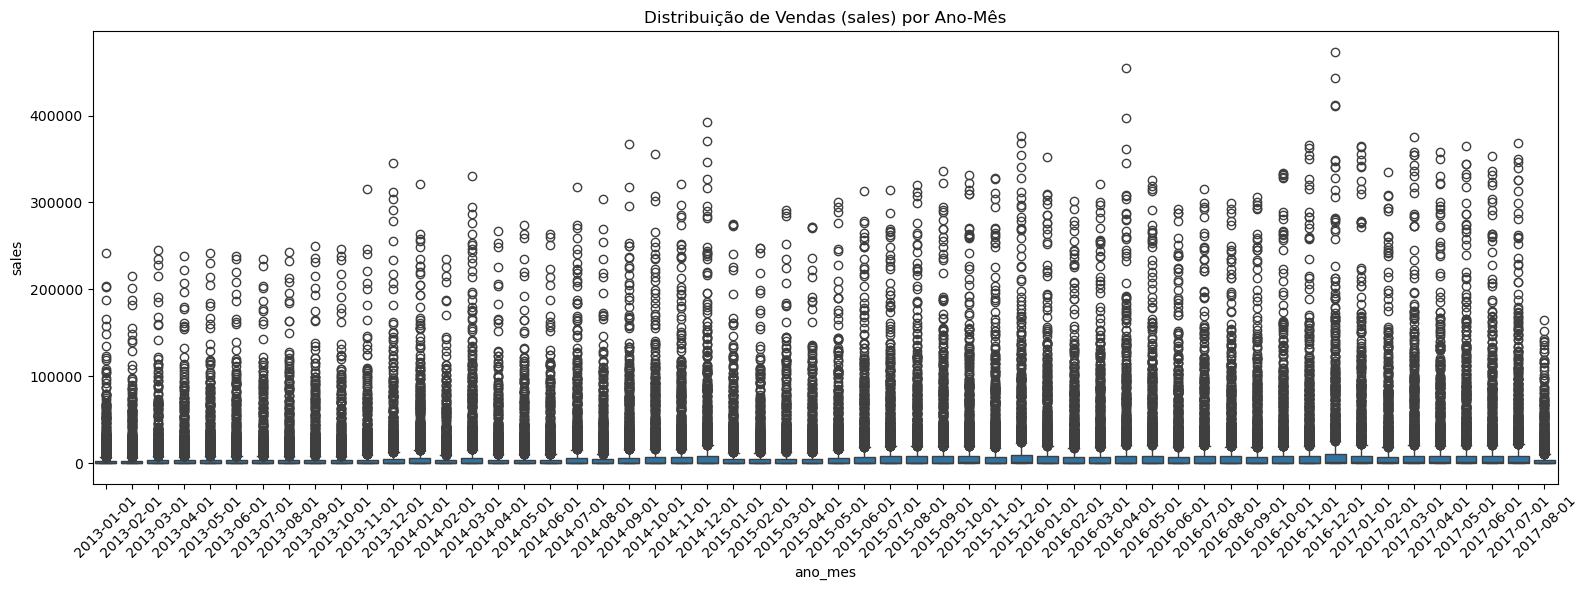

In [74]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='ano_mes', y='sales', data=df)
plt.xticks(rotation=45)
plt.title('Distribuição de Vendas (sales) por Ano-Mês')
plt.tight_layout()
plt.show()

In [75]:
def identificar_outliers_zscore(serie, threshold=3):
    z_scores = (serie - serie.mean()) / serie.std()
    return np.abs(z_scores) > threshold

df['outlier'] = identificar_outliers_zscore(df['sales'])

outlier_stats = df.groupby('ano_mes').agg(
    total=('sales', 'count'),
    outliers=('outlier', 'sum')
).reset_index()

outlier_stats['pct_outlier'] = (outlier_stats['outliers'] / outlier_stats['total']) * 100


In [76]:
total_outliers = outlier_stats['outliers'].sum()
total_registros = outlier_stats['total'].sum()
pct_geral_outlier = (total_outliers / total_registros) * 100

print(f'Total de registros: {total_registros:,}')
print(f'Total de outliers: {total_outliers:,}')
print(f'Percentual geral de outliers: {pct_geral_outlier:.2f}%')
print(outlier_stats[['ano_mes', 'pct_outlier']])

Total de registros: 99,792
Total de outliers: 2,288
Percentual geral de outliers: 2.29%
      ano_mes  pct_outlier
0  2013-01-01     0.729517
1  2013-02-01     0.617284
2  2013-03-01     0.953984
3  2013-04-01     0.897868
4  2013-05-01     0.897868
5  2013-06-01     0.953984
6  2013-07-01     1.066218
7  2013-08-01     1.122334
8  2013-09-01     1.010101
9  2013-10-01     1.010101
10 2013-11-01     1.066218
11 2013-12-01     1.627385
12 2014-01-01     2.188552
13 2014-02-01     0.953984
14 2014-03-01     2.413019
15 2014-04-01     1.178451
16 2014-05-01     1.290685
17 2014-06-01     1.234568
18 2014-07-01     2.244669
19 2014-08-01     1.346801
20 2014-09-01     2.356902
21 2014-10-01     2.413019
22 2014-11-01     2.413019
23 2014-12-01     3.310887
24 2015-01-01     1.402918
25 2015-02-01     1.122334
26 2015-03-01     1.795735
27 2015-04-01     1.627385
28 2015-05-01     2.076319
29 2015-06-01     2.693603
30 2015-07-01     2.918070
31 2015-08-01     2.918070
32 2015-09-01     3.0

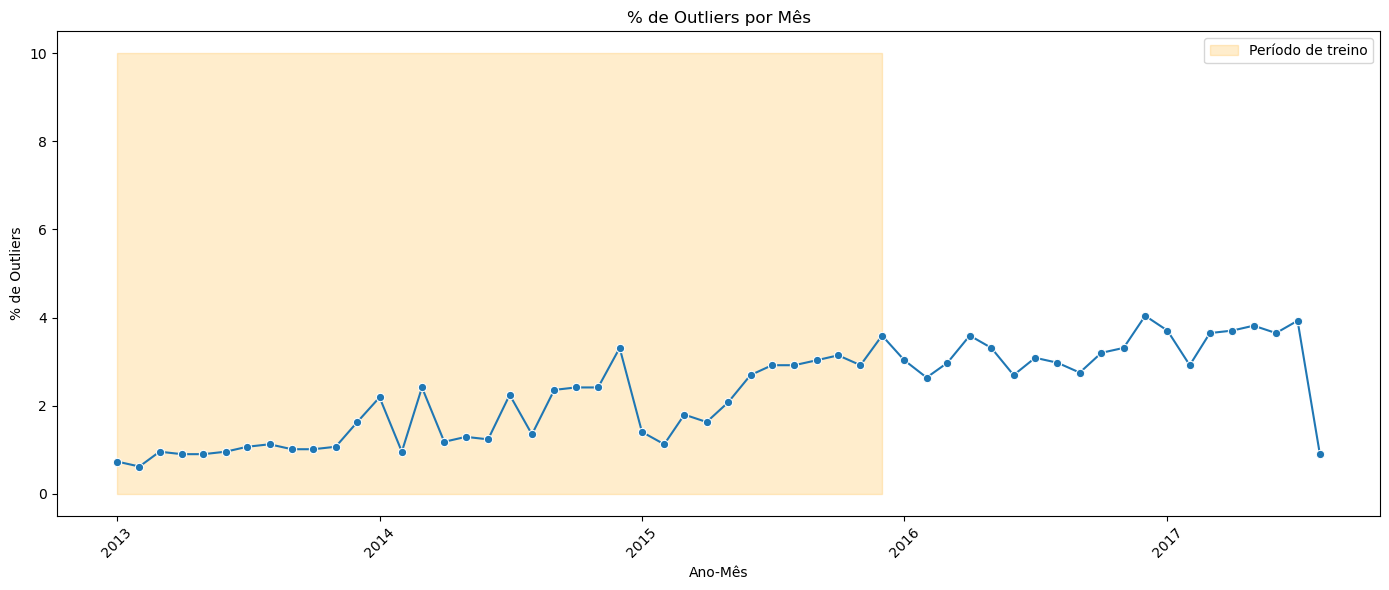

In [77]:
plt.figure(figsize=(14,6))
sns.lineplot(data=outlier_stats, x='ano_mes', y='pct_outlier', marker='o')
plt.fill_between(outlier_stats['ano_mes'], 0, 10, where=(outlier_stats['ano_mes'] < '2016-01-01'), color='orange', alpha=0.2, label='Período de treino')
plt.title('% de Outliers por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('% de Outliers')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [78]:
# Separar os outliers
df_outliers = df[df['outlier']].copy()

# Separar a base sem os outliers
df_sem_outliers = df[~df['outlier']].copy()

# Verificar o resumo
print(f"Base original     : {df.shape[0]:,} linhas")
print(f"Sem outliers      : {df_sem_outliers.shape[0]:,} linhas")
print(f"Apenas outliers   : {df_outliers.shape[0]:,} linhas ({df_outliers.shape[0]/df.shape[0]*100:.2f}%)")


Base original     : 99,792 linhas
Sem outliers      : 97,504 linhas
Apenas outliers   : 2,288 linhas (2.29%)


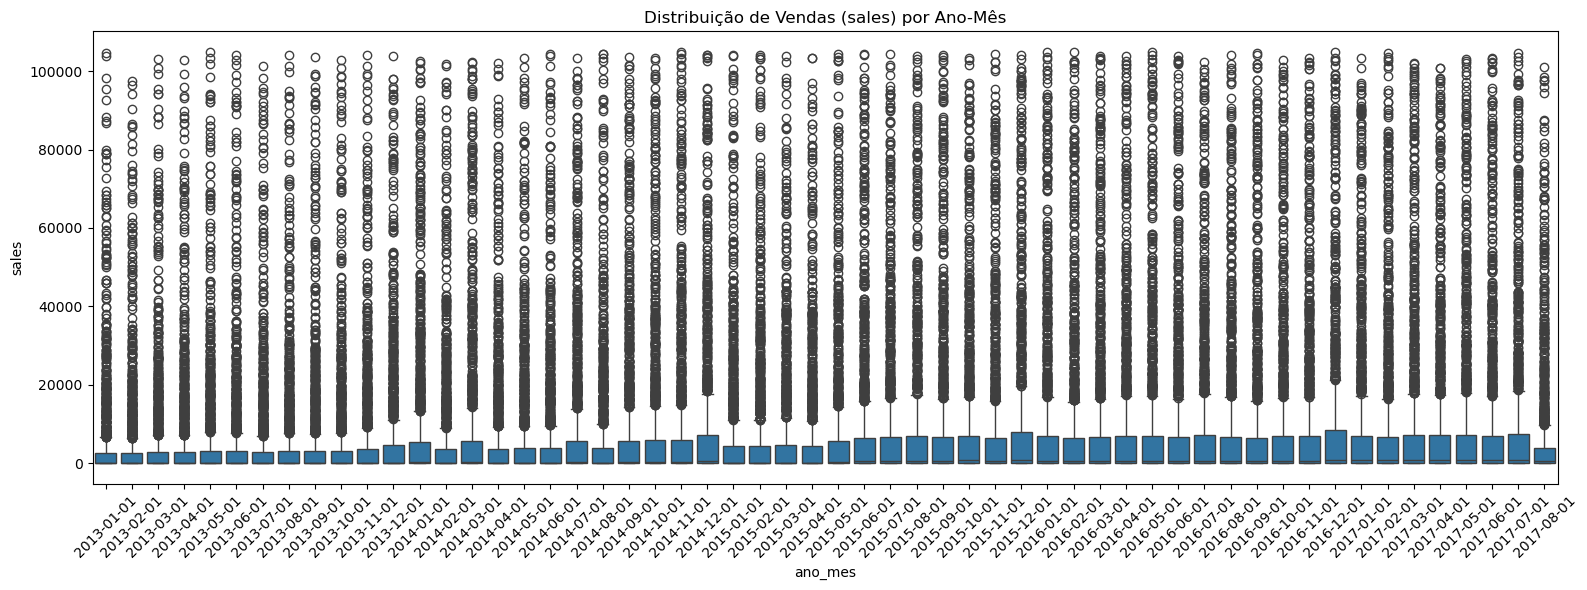

In [79]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='ano_mes', y='sales', data=df_sem_outliers)
plt.xticks(rotation=45)
plt.title('Distribuição de Vendas (sales) por Ano-Mês')
plt.tight_layout()
plt.show()

In [80]:
def identificar_outliers_zscore(serie, threshold=3):
    z_scores = (serie - serie.mean()) / serie.std()
    return np.abs(z_scores) > threshold

df_sem_outliers['outlier'] = identificar_outliers_zscore(df_sem_outliers['sales'])

outlier_stats2 = df_sem_outliers.groupby('ano_mes').agg(
    total=('sales', 'count'),
    outliers=('outlier', 'sum')
).reset_index()

outlier_stats2['pct_outlier'] = (outlier_stats2['outliers'] / outlier_stats2['total']) * 100

total_outliers = outlier_stats2['outliers'].sum()
total_registros = outlier_stats2['total'].sum()
pct_geral_outlier = (total_outliers / total_registros) * 100

print(f'Total de registros: {total_registros:,}')
print(f'Total de outliers: {total_outliers:,}')
print(f'Percentual geral de outliers: {pct_geral_outlier:.2f}%')
print(outlier_stats2[['ano_mes', 'pct_outlier']])


Total de registros: 97,504
Total de outliers: 3,160
Percentual geral de outliers: 3.24%
      ano_mes  pct_outlier
0  2013-01-01     1.921990
1  2013-02-01     1.976285
2  2013-03-01     2.379603
3  2013-04-01     2.038505
4  2013-05-01     2.321631
5  2013-06-01     2.322946
6  2013-07-01     2.155417
7  2013-08-01     2.270148
8  2013-09-01     2.324263
9  2013-10-01     2.210884
10 2013-11-01     2.325581
11 2013-12-01     2.452938
12 2014-01-01     3.786575
13 2014-02-01     2.379603
14 2014-03-01     3.737780
15 2014-04-01     2.441794
16 2014-05-01     2.217169
17 2014-06-01     2.329545
18 2014-07-01     3.673938
19 2014-08-01     2.161547
20 2014-09-01     3.563218
21 2014-10-01     3.507763
22 2014-11-01     3.507763
23 2014-12-01     3.656413
24 2015-01-01     2.504269
25 2015-02-01     2.497162
26 2015-03-01     2.342857
27 2015-04-01     2.452938
28 2015-05-01     2.808023
29 2015-06-01     3.748558
30 2015-07-01     3.641618
31 2015-08-01     3.930636
32 2015-09-01     3.9

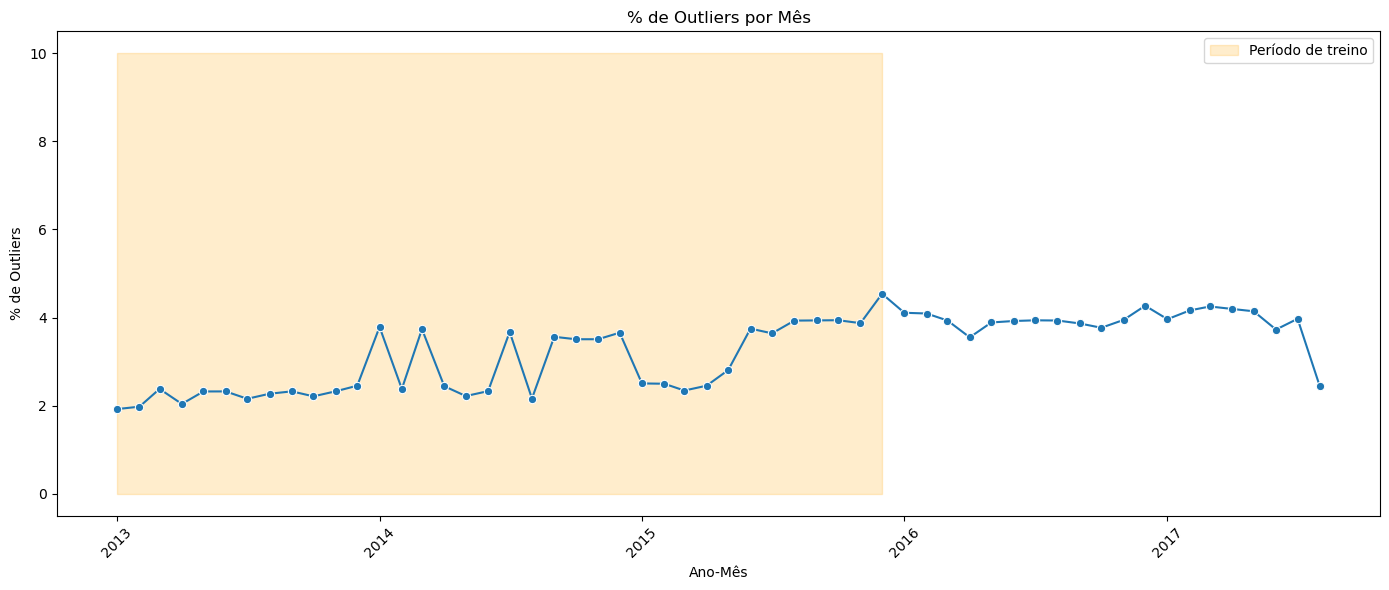

In [81]:
plt.figure(figsize=(14,6))
sns.lineplot(data=outlier_stats2, x='ano_mes', y='pct_outlier', marker='o')
plt.fill_between(outlier_stats2['ano_mes'], 0, 10, where=(outlier_stats2['ano_mes'] < '2016-01-01'), color='orange', alpha=0.2, label='Período de treino')
plt.title('% de Outliers por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('% de Outliers')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Outliers da segunda rodada
df_outliers_2 = df_sem_outliers[df_sem_outliers['outlier']].copy()

# Atualizar o DataFrame df_outliers empilhando os novos
df_outliers = pd.concat([df_outliers, df_outliers_2], ignore_index=True)

# Atualizar a base final sem outliers
df_sem_outliers2 = df_sem_outliers[~df_sem_outliers['outlier']].copy()

# Verificar o resumo atualizado
print(f"Base antes 2ª rodada: {df_sem_outliers.shape[0]:,} linhas")
print(f"Sem outliers        : {df_sem_outliers2.shape[0]:,} linhas")
print(f"Total outliers  2ª rodada    : {df_outliers.shape[0]:,} linhas ({df_outliers.shape[0]/df_sem_outliers.shape[0]*100:.2f}%)")


Base após 2ª rodada: 97,504 linhas
Sem outliers        : 94,344 linhas
Total outliers      : 5,448 linhas (5.59%)


In [60]:
df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'ano', 'mes',
       'qtd_feriados', 'volume', 'dias_ativos_venda', 'family_top6', 'ano_mes',
       'outlier'],
      dtype='object')

In [84]:
# Exemplo: salvar em CSV se quiser
df_outliers.to_csv('2.2.outliers.csv', index=False)
df_sem_outliers2.to_csv('2.1.dados_limpos.csv', index=False)